In [7]:
library(openxlsx)
library(gridExtra)
library(dplyr)
library(lattice)

I will begin by reading csv files and merging them into one table

In [8]:
sales <- read.csv('C:/Users/kdirg/Downloads/Forecasting FuturePros/sales.csv')
features <- read.csv('C:/Users/kdirg/Downloads/Forecasting FuturePros/features.csv') 
stores <- read.csv('C:/Users/kdirg/Downloads/Forecasting FuturePros/stores.csv')

In [9]:
dat <- left_join(sales, stores, by = 'Store')
dat <- left_join(dat, features, by = c('Store', 'Date'))

Data correction. For attributes "Isholiday": False = 0, True = 1.
For attribute "Type": "A" = 0, "B" = 1, "C" = 2

In [10]:
dat[dat=="FALSE"] <- 0
dat[dat=="TRUE"] <- 1
dat[dat=="A"] <- 0
dat[dat=="B"] <- 1
dat[dat=="C"] <- 2
dat$Size <- as.numeric(dat$Size)
dat$Type <- as.numeric(dat$Type)
dat$Date <- as.Date(dat$Date, "%d/%m/%y")
dat$Date <- as.numeric(dat$Date)

Basic information about Weekly Sales:

Minimum value = -4988.94 
Maximum value = 693099.4 
Average value = 15981.26 
Median = 7612.03 


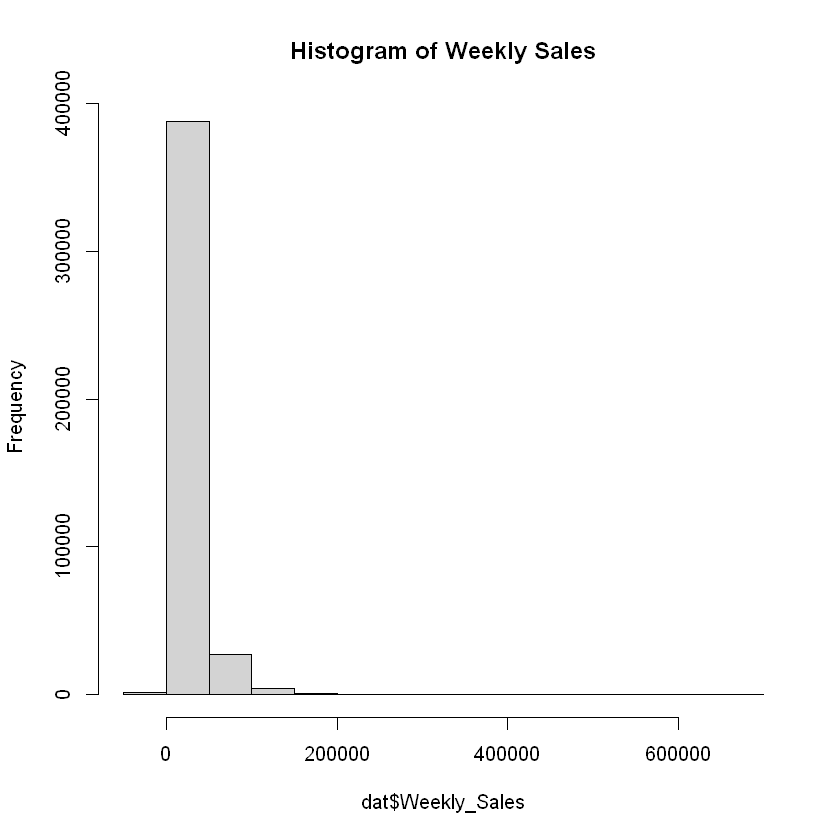

In [31]:
cat('Minimum value =', min(dat$Weekly_Sales), "\n")
cat('Maximum value =', max(dat$Weekly_Sales), "\n")
cat('Average value =', mean(dat$Weekly_Sales), "\n")
cat('Median =', median(dat$Weekly_Sales), "\n")
hist(dat$Weekly_Sales, main = "Histogram of Weekly Sales")

I will filter data which is above average and analyse its properties

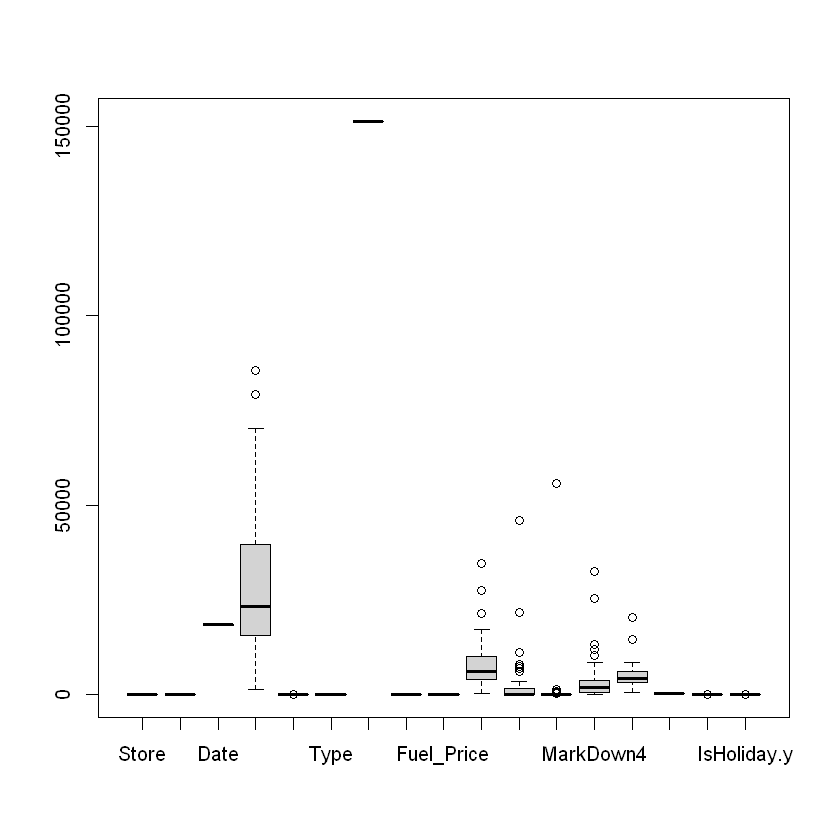

In [13]:
dat_above_av <- dat[1:769,]
boxplot(dat_above_av)

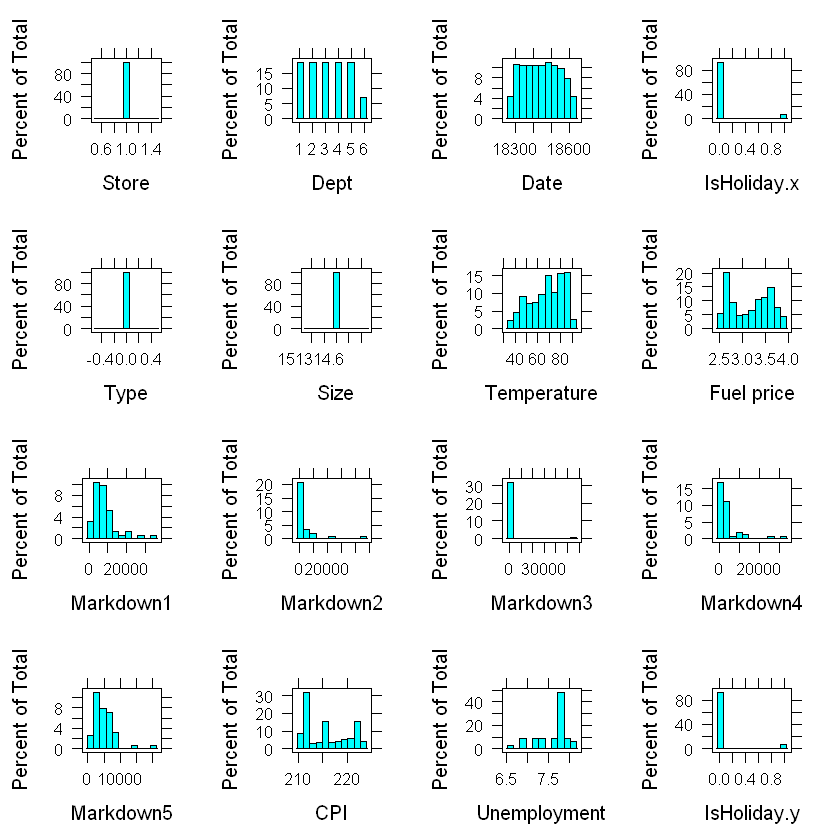

In [21]:
p1 <- histogram(dat_above_av$Store, xlab = "Store")
p2 <- histogram(dat_above_av$Dept, xlab = "Dept")
p3 <- histogram(dat_above_av$Date, xlab = "Date")
p4 <- histogram(dat_above_av$IsHoliday.x, xlab = "IsHoliday.x")
p5 <- histogram(dat_above_av$Type, xlab = "Type")
p6 <- histogram(dat_above_av$Size, xlab = "Size")
p7 <- histogram(dat_above_av$Temperature, xlab = "Temperature")
p8 <- histogram(dat_above_av$Fuel_Price, xlab = "Fuel price")
p9 <- histogram(dat_above_av$MarkDown1, xlab = "Markdown1")
p10 <- histogram(dat_above_av$MarkDown2, xlab = "Markdown2")
p11 <- histogram(dat_above_av$MarkDown3, xlab = "Markdown3")
p12 <- histogram(dat_above_av$MarkDown4, xlab = "Markdown4")
p13 <- histogram(dat_above_av$MarkDown5, xlab = "Markdown5")
p14 <- histogram(dat_above_av$CPI, xlab = "CPI")
p15 <- histogram(dat_above_av$Unemployment, xlab = "Unemployment")
p16 <- histogram(dat_above_av$IsHoliday.y, xlab = "IsHoliday.y")

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10,
             p11, p12, p13, p14, p15, p16, nrow = 4)

Finding out correlation between variables:

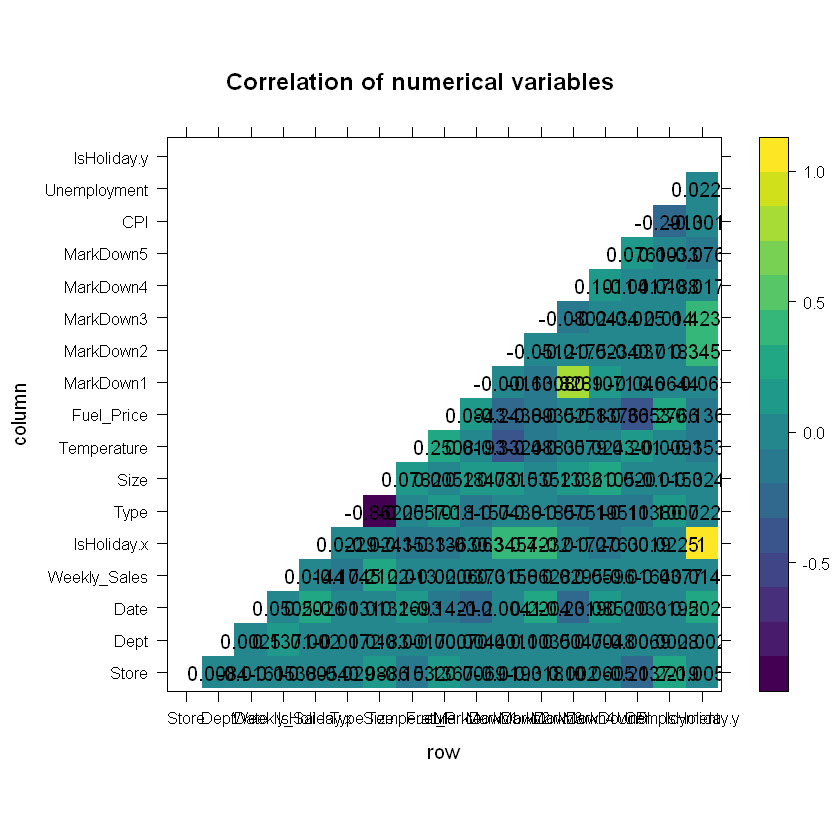

In [22]:
myPanel <- function(x, y, z, ...){
  lattice::panel.levelplot(x,y,z,...)
  my_text <- ifelse(!is.na(z), paste0(round(z, 4)), "")
  lattice::panel.text(x, y, my_text)
}

mask = cor(dat, use = "complete.obs")
mask[upper.tri(mask, diag = TRUE)] <- NA
lattice::levelplot(mask, 
                   panel = myPanel, 
                   col.regions = viridisLite::viridis(100), 
                   main = 'Correlation of numerical variables')

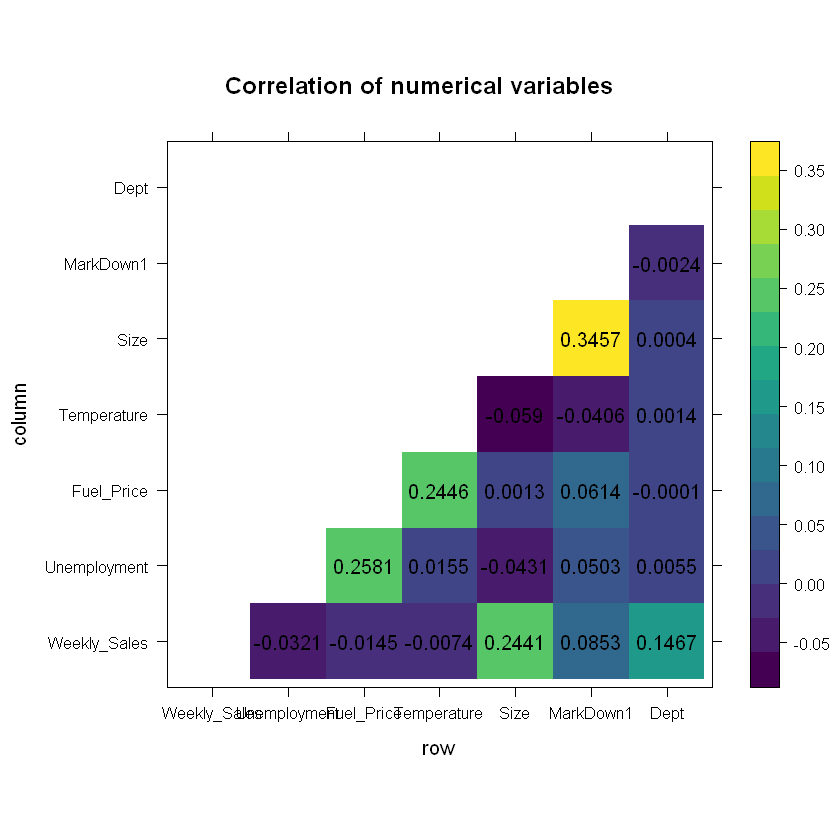

In [23]:
plt_cols <- c("Weekly_Sales", "Unemployment", "Fuel_Price", "Temperature", "Size", "MarkDown1", "Dept")

mask = cor(dat[, plt_cols], use = "complete.obs")
mask[upper.tri(mask, diag = TRUE)] <- NA
lattice::levelplot(mask, 
                   panel = myPanel, 
                   col.regions = viridisLite::viridis(100), 
                   main = 'Correlation of numerical variables')

Variables that has the highest impact for weekly sales are Size, Dept and MarkDown1, so I will try to evaluate its model.